# Appendix 2: Age Pyramid

In [2]:
require(tidyverse)
require(scales)

In [4]:
nhanes <- read_csv("Datasets/nhanes.csv")

In [5]:
make.bins = function(Age, bins){
    first = min(Age)
    nth = max(Age)
    range = nth - first
    interval = (range/bins) 
    return (cut(Age, 0:nth*interval, include.lowest = T))
}

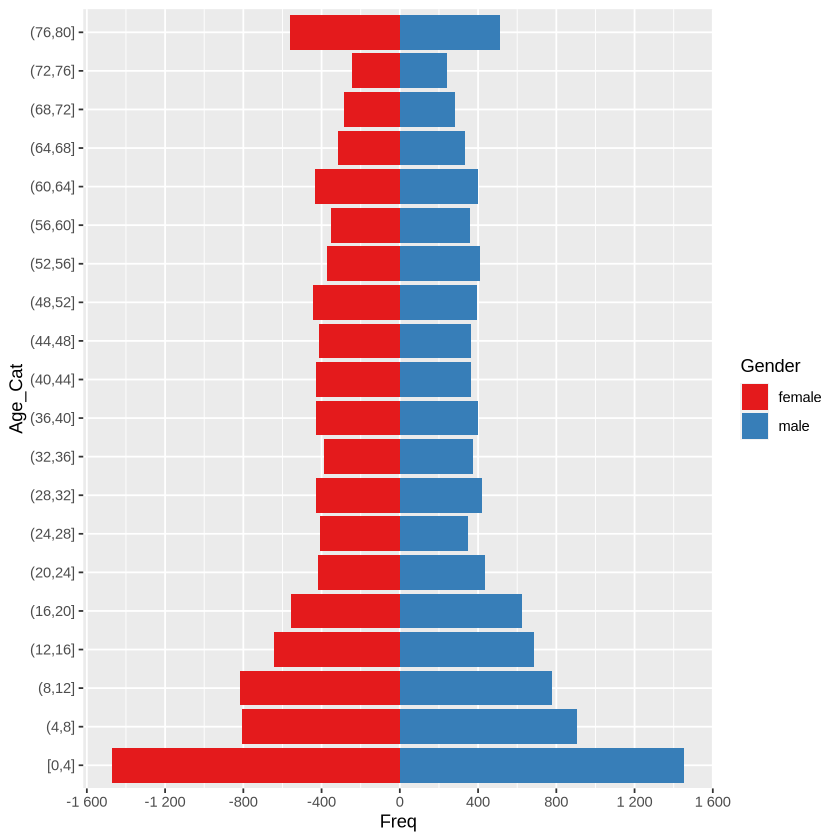

In [6]:
nhanes %>% 
    select(Gender, Age) %>% 
    mutate(Age_Cat = make.bins(Age, bins=20)) %>% 
    group_by(Age_Cat, Gender) %>% 
    summarise(Freq=n(), .groups='drop') %>% 
    mutate(Freq = ifelse(Gender == 'female', Freq*-1, Freq)) %>% 
    ggplot() + 
        geom_col(aes(x=Age_Cat, y=Freq, fill=Gender)) + 
        coord_flip() + 
        scale_fill_brewer(palette = 'Set1') + 
        scale_y_continuous(n.breaks=10, labels = label_number(scale=1))